

Information from the dataset provider 
**Toronto Fire Services**. Toronto Fire Services (TFS) provides fire protection, technical rescue services, hazardous materials response, and first responder emergency medical assistance in Toronto, Ontario, Canada. Toronto Fire Services is currently the largest municipal fire department in Cana

**About the dataset** <br>
This dataset contains 27 columns and more than 11.000 rows about fire incidents that occurred in Toronto between 2011 and 2019.


# Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
data = pd.read_csv("D:/BU/Sem 3/Machine learning/dataset/Fire-Incidents.csv")
data.columns

Index(['Area_of_Origin', 'Business_Impact', 'Civilian_Casualties',
       'Count_of_Persons_Rescued', 'Estimated_Dollar_Loss',
       'Estimated_Number_Of_Persons_Displaced', 'Ext_agent_app_or_defer_time',
       'Extent_Of_Fire', 'Fire_Alarm_System_Impact_on_Evacuation',
       'Fire_Alarm_System_Operation', 'Fire_Alarm_System_Presence',
       'Fire_Under_Control_Time', 'Ignition_Source', 'Incident_Station_Area',
       'Incident_Ward', 'Last_TFS_Unit_Clear_Time', 'Latitude', 'Longitude',
       'Material_First_Ignited', 'Method_Of_Fire_Control', 'Possible_Cause',
       'Property_Use', 'Smoke_Alarm_at_Fire_Origin_Alarm_Failure',
       'Smoke_Alarm_at_Fire_Origin_Alarm_Type', 'Status_of_Fire_On_Arrival',
       'TFS_Alarm_Time', 'TFS_Arrival_Time'],
      dtype='object')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11214 entries, 0 to 11213
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Area_of_Origin                            11214 non-null  object 
 1   Business_Impact                           11214 non-null  object 
 2   Civilian_Casualties                       11214 non-null  int64  
 3   Count_of_Persons_Rescued                  11214 non-null  int64  
 4   Estimated_Dollar_Loss                     11214 non-null  int64  
 5   Estimated_Number_Of_Persons_Displaced     11214 non-null  int64  
 6   Ext_agent_app_or_defer_time               11214 non-null  object 
 7   Extent_Of_Fire                            11214 non-null  object 
 8   Fire_Alarm_System_Impact_on_Evacuation    11214 non-null  object 
 9   Fire_Alarm_System_Operation               11214 non-null  object 
 10  Fire_Alarm_System_Presence        

## For my analysis I'll take the following columns and store it in a new dataframe

In [4]:
df= data[['Area_of_Origin','Civilian_Casualties','Ignition_Source','Incident_Ward','Last_TFS_Unit_Clear_Time','Material_First_Ignited','Possible_Cause','TFS_Alarm_Time','TFS_Arrival_Time','Fire_Under_Control_Time']]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11214 entries, 0 to 11213
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Area_of_Origin            11214 non-null  object 
 1   Civilian_Casualties       11214 non-null  int64  
 2   Ignition_Source           11214 non-null  object 
 3   Incident_Ward             11181 non-null  float64
 4   Last_TFS_Unit_Clear_Time  11214 non-null  object 
 5   Material_First_Ignited    11214 non-null  object 
 6   Possible_Cause            11214 non-null  object 
 7   TFS_Alarm_Time            11214 non-null  object 
 8   TFS_Arrival_Time          11214 non-null  object 
 9   Fire_Under_Control_Time   11214 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 876.2+ KB


Columns Civilian_Casualities and Incident_ward is of numerical type and other attributes are categorical.
This dataset has 11214 rows and 10 columns

## Printing Unique values

In [6]:
for i in df:
    print(i)
    print(df[i].unique())
    print("\n")

Area_of_Origin
['Porch or Balcony' 'Cooking Area or Kitchen'
 'Living Area (e.g. living, TV, recreation, etc)'
 'Undetermined  (formerly 98)'
 'Sleeping Area or Bedroom (inc. patients room, dormitory, etc)'
 'Engine Area' 'Concealed Ceiling Area' 'Hallway, Corridor' 'Laundry Area'
 'Roof' 'Electrical Systems' 'Storage Area (outside)'
 'Basement/cellar (not partitioned)' 'Court, Patio, Terrace'
 'Lobby, Entranceway'
 'Trash, Rubbish Storage (inc garbage chute room, garbage/industri'
 'Other Outside Area' 'Closet (eg. clothes, broom, linen closet, etc.)'
 'Garage' 'Trash, rubbish area (outside)'
 'Dining or Beverage Area (inc mess, canteen, lunchroom, cafeteria'
 'Washroom or Bathroom (toilet,restroom/locker room)' 'Attached Deck'
 'Other - unclassified' 'Mechanical/Electrical Services Room'
 'Other Storage Area' 'Stairway, Escalator' 'Attic Area'
 'Other Structural Area'
 'HVAC Equipment Room (furnace room, water heater closet, boiler)'
 'Office' 'Exterior Wall'
 'Process Manufacturing 

In [7]:
df.isnull().sum()

Area_of_Origin               0
Civilian_Casualties          0
Ignition_Source              0
Incident_Ward               33
Last_TFS_Unit_Clear_Time     0
Material_First_Ignited       0
Possible_Cause               0
TFS_Alarm_Time               0
TFS_Arrival_Time             0
Fire_Under_Control_Time      0
dtype: int64

In [8]:
df.fillna(0, inplace=True)

Incident_ward has 33 null values. Since there is no ward numbered 0, we shall fill the missing values with 0 and keep the data without omiting them

In [9]:
df.describe()

,Civilian_Casualties,Incident_Ward
count,11214.000000,11214.000000
mean,0.112538,19.525058
std,0.456429,11.793265
min,0.000000,0.000000
25%,0.000000,9.250000
50%,0.000000,19.000000
75%,0.000000,28.000000
max,15.000000,44.000000


This dataset contains data of wards 1 to 44.

## Wards with frequent fire incidents

<AxesSubplot:xlabel='count', ylabel='Incident_Ward'>

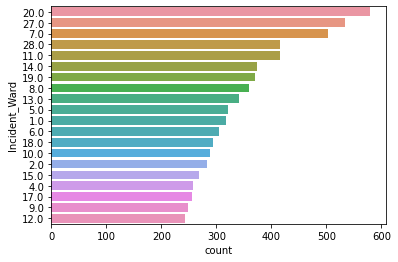

In [10]:

order = df['Incident_Ward'].value_counts(ascending=False).head(20).index
sns.countplot(y=df['Incident_Ward'],order=order)

Ward 20 has recorded frequent fire incidents

## Area of Origin

<AxesSubplot:xlabel='count', ylabel='Area_of_Origin'>

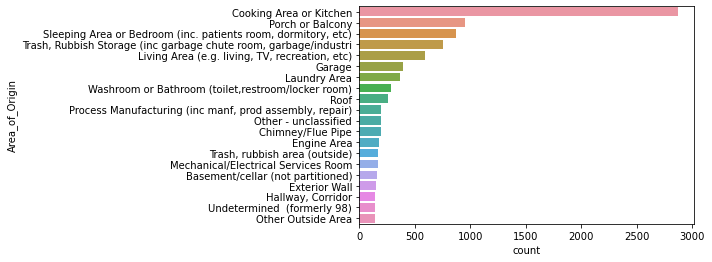

In [10]:

order = df['Area_of_Origin'].value_counts(ascending=False).head(20).index
sns.countplot(y=df['Area_of_Origin'],order=order)

Most fire accidents are originated from cooking area or Kitchen

## Material First Ignited

<AxesSubplot:xlabel='count', ylabel='Material_First_Ignited'>

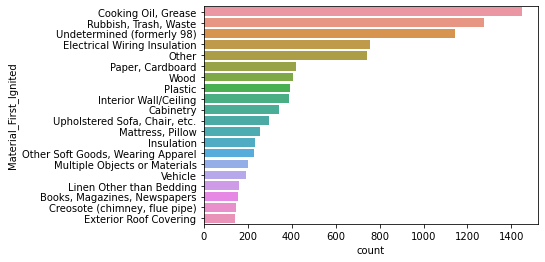

In [11]:

order = df['Material_First_Ignited'].value_counts(ascending=False).head(20).index
sns.countplot(y=df['Material_First_Ignited'],order=order)

In Most fire accidents Cooking Oil,Grease were the first material to catch fire

In [12]:
df.head()

,Area_of_Origin,Civilian_Casualties,Ignition_Source,Incident_Ward,Last_TFS_Unit_Clear_Time,Material_First_Ignited,Possible_Cause,TFS_Alarm_Time,TFS_Arrival_Time,Fire_Under_Control_Time
0,Porch or Balcony,0,Undetermined,18.0,2018-08-24T17:42:43,Undetermined (formerly 98),Undetermined,2018-08-24T16:49:36,2018-08-24T16:54:09,2018-08-24T17:06:28
1,Cooking Area or Kitchen,0,"Other Cooking Items (eg Toaster, Kettle, elec ...",7.0,2018-11-24T12:45:21,Plastic,Under Investigation,2018-11-24T07:09:12,2018-11-24T07:14:23,2018-11-24T07:19:00
2,"Living Area (e.g. living, TV, recreation, etc)",1,Undetermined,27.0,2017-02-09T23:36:33,Undetermined (formerly 98),Undetermined,2017-02-09T17:45:07,2017-02-09T17:48:49,2017-02-09T18:36:21
3,Undetermined (formerly 98),0,Undetermined,20.0,2012-11-01T16:30:31,Undetermined (formerly 98),Undetermined,2012-10-30T00:42:01,2012-10-30T00:44:58,2012-10-30T01:28:48
4,"Sleeping Area or Bedroom (inc. patients room, ...",8,Matches or Lighters (unable to distinguish),5.0,2018-07-08T16:44:07,Bedding,Suspected Arson,2018-07-08T04:08:50,2018-07-08T04:13:54,2018-07-08T04:38:28


In [13]:
df3=df

## Feature Engineering

In [14]:
df3['TFS_Alarm_Time'] = df3['TFS_Alarm_Time'].str.replace('T', ' ')
df3['TFS_Arrival_Time'] = df3['TFS_Arrival_Time'].str.replace('T', ' ')
df3['Fire_Under_Control_Time'] = df3['Fire_Under_Control_Time'].str.replace('T', ' ')
df3['Last_TFS_Unit_Clear_Time'] = df3['Last_TFS_Unit_Clear_Time'].str.replace('T', ' ')

df3['TFS_Alarm_Time'] = pd.to_datetime(df3['TFS_Alarm_Time']).dt.strftime('%d/%m/%Y %H:%M:%S')
df3['TFS_Arrival_Time'] = pd.to_datetime(df3['TFS_Arrival_Time']).dt.strftime('%d/%m/%Y %H:%M:%S')
df3['Fire_Under_Control_Time'] = pd.to_datetime(df3['Fire_Under_Control_Time']).dt.strftime('%d/%m/%Y %H:%M:%S')
df3['Last_TFS_Unit_Clear_Time'] = pd.to_datetime(df3['Last_TFS_Unit_Clear_Time']).dt.strftime('%d/%m/%Y %H:%M:%S')

df3['TFS_Alarm_Time']=df3['TFS_Alarm_Time'].astype('datetime64[ns]')
df3['TFS_Arrival_Time']=df3['TFS_Arrival_Time'].astype('datetime64[ns]')
df3['Fire_Under_Control_Time'] =df3['Fire_Under_Control_Time'] .astype('datetime64[ns]')
df3['Last_TFS_Unit_Clear_Time'] =df3['Last_TFS_Unit_Clear_Time'] .astype('datetime64[ns]')


In [15]:

df3['Year'] = pd.DatetimeIndex(df3['TFS_Alarm_Time']).year
df3['Month'] = pd.DatetimeIndex(df3['TFS_Alarm_Time']).month
df3['Day_of_Week'] = pd.DatetimeIndex(df3['TFS_Alarm_Time']).dayofweek


b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Evening','Night']
df3['Part_of_Day'] = pd.cut(pd.DatetimeIndex(df3['TFS_Alarm_Time']).hour, bins=b, labels=l, include_lowest=True)


df3['Reaction_time_minutes'] = ((df3.TFS_Arrival_Time - df3.TFS_Alarm_Time).dt.total_seconds()/60).round()
df3['Extinguish_time_minutes'] =((df3.Fire_Under_Control_Time - df3.TFS_Arrival_Time).dt.total_seconds()/60).round()
df3['Time_spent_minutes'] = ((df3.Last_TFS_Unit_Clear_Time - df3.TFS_Arrival_Time).dt.total_seconds()/60).round()


In [16]:
df3.head()

,Area_of_Origin,Civilian_Casualties,Ignition_Source,Incident_Ward,Last_TFS_Unit_Clear_Time,Material_First_Ignited,Possible_Cause,TFS_Alarm_Time,TFS_Arrival_Time,Fire_Under_Control_Time,Year,Month,Day_of_Week,Part_of_Day,Reaction_time_minutes,Extinguish_time_minutes,Time_spent_minutes
0,Porch or Balcony,0,Undetermined,18.0,2018-08-24 17:42:43,Undetermined (formerly 98),Undetermined,2018-08-24 16:49:36,2018-08-24 16:54:09,2018-08-24 17:06:28,2018,8,4,Noon,5.0,12.0,49.0
1,Cooking Area or Kitchen,0,"Other Cooking Items (eg Toaster, Kettle, elec ...",7.0,2018-11-24 12:45:21,Plastic,Under Investigation,2018-11-24 07:09:12,2018-11-24 07:14:23,2018-11-24 07:19:00,2018,11,5,Early Morning,5.0,5.0,331.0
2,"Living Area (e.g. living, TV, recreation, etc)",1,Undetermined,27.0,2017-09-02 23:36:33,Undetermined (formerly 98),Undetermined,2017-09-02 17:45:07,2017-09-02 17:48:49,2017-09-02 18:36:21,2017,9,5,Evening,4.0,48.0,348.0
3,Undetermined (formerly 98),0,Undetermined,20.0,2012-01-11 16:30:31,Undetermined (formerly 98),Undetermined,2012-10-30 00:42:01,2012-10-30 00:44:58,2012-10-30 01:28:48,2012,10,1,Late Night,3.0,44.0,-420974.0
4,"Sleeping Area or Bedroom (inc. patients room, ...",8,Matches or Lighters (unable to distinguish),5.0,2018-08-07 16:44:07,Bedding,Suspected Arson,2018-08-07 04:08:50,2018-08-07 04:13:54,2018-08-07 04:38:28,2018,8,1,Late Night,5.0,25.0,750.0


<AxesSubplot:ylabel='Extinguish_time_minutes'>

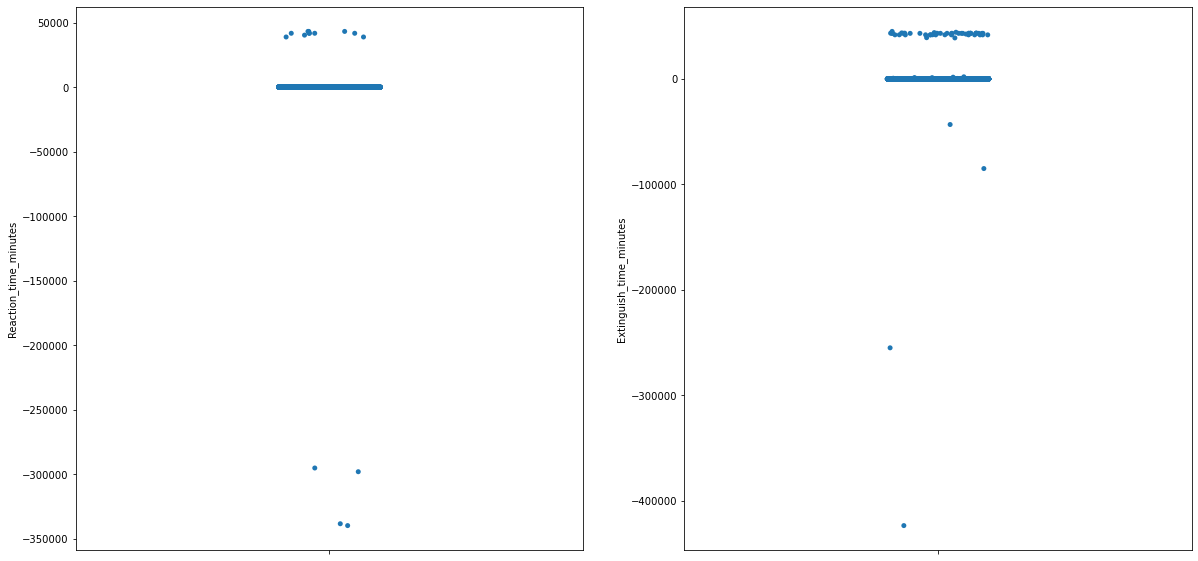

In [17]:
fig, axes = plt.subplots(1,2, figsize=(20,10))

sns.stripplot(data=df3, y='Reaction_time_minutes', ax=axes[0])
sns.stripplot(data=df3, y='Extinguish_time_minutes', ax=axes[1])

Time cannot be in negative.Since there seems to be values in negative, we will filter the dataset as such there is no negative values

In [18]:
df3 = df3[(df3.Extinguish_time_minutes < 750) & (df3.Reaction_time_minutes < 250)]
df3 = df3[(df3.Time_spent_minutes >=0)]
df3 = df3[(df3.Extinguish_time_minutes >= 0 ) & (df3.Reaction_time_minutes >=0)]

<AxesSubplot:ylabel='Extinguish_time_minutes'>

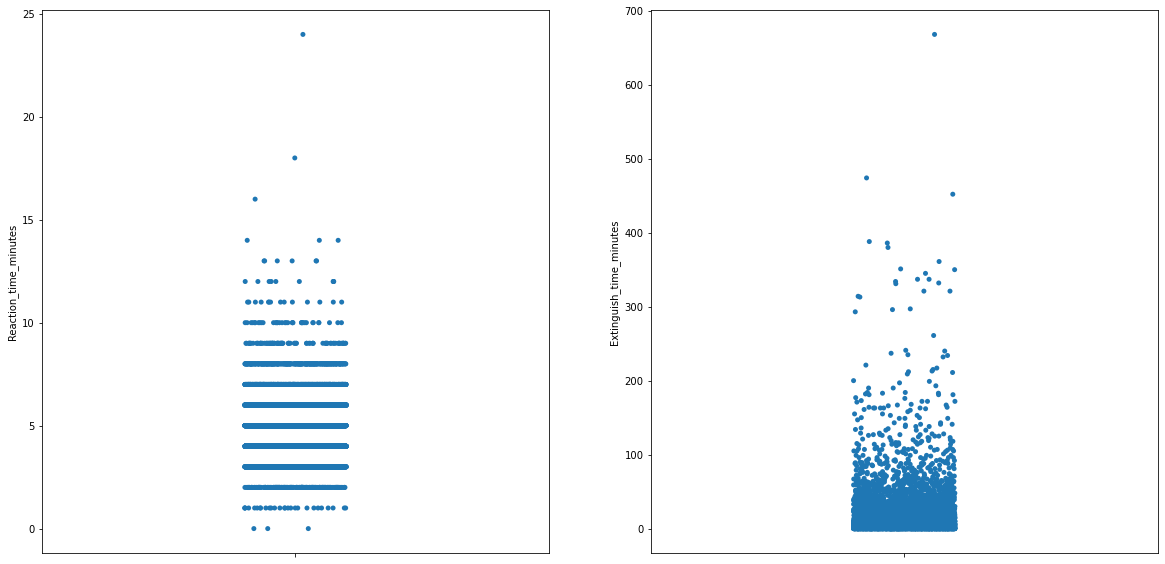

In [19]:
fig, axes = plt.subplots(1,2, figsize=(20,10))

sns.stripplot(data=df3, y='Reaction_time_minutes', ax=axes[0])
sns.stripplot(data=df3, y='Extinguish_time_minutes', ax=axes[1])

Now the dataset has been cleaned

In [20]:
df3['Casuality']=df3['Civilian_Casualties']
df3.loc[df3.Casuality > 0, 'Casuality'] = 'Casualties'
df3.loc[df3.Casuality == 0, 'Casuality'] = 'No Casualties'


In [21]:
df3.head()

,Area_of_Origin,Civilian_Casualties,Ignition_Source,Incident_Ward,Last_TFS_Unit_Clear_Time,Material_First_Ignited,Possible_Cause,TFS_Alarm_Time,TFS_Arrival_Time,Fire_Under_Control_Time,Year,Month,Day_of_Week,Part_of_Day,Reaction_time_minutes,Extinguish_time_minutes,Time_spent_minutes,Casuality
0,Porch or Balcony,0,Undetermined,18.0,2018-08-24 17:42:43,Undetermined (formerly 98),Undetermined,2018-08-24 16:49:36,2018-08-24 16:54:09,2018-08-24 17:06:28,2018,8,4,Noon,5.0,12.0,49.0,No Casualties
1,Cooking Area or Kitchen,0,"Other Cooking Items (eg Toaster, Kettle, elec ...",7.0,2018-11-24 12:45:21,Plastic,Under Investigation,2018-11-24 07:09:12,2018-11-24 07:14:23,2018-11-24 07:19:00,2018,11,5,Early Morning,5.0,5.0,331.0,No Casualties
2,"Living Area (e.g. living, TV, recreation, etc)",1,Undetermined,27.0,2017-09-02 23:36:33,Undetermined (formerly 98),Undetermined,2017-09-02 17:45:07,2017-09-02 17:48:49,2017-09-02 18:36:21,2017,9,5,Evening,4.0,48.0,348.0,Casualties
4,"Sleeping Area or Bedroom (inc. patients room, ...",8,Matches or Lighters (unable to distinguish),5.0,2018-08-07 16:44:07,Bedding,Suspected Arson,2018-08-07 04:08:50,2018-08-07 04:13:54,2018-08-07 04:38:28,2018,8,1,Late Night,5.0,25.0,750.0,Casualties
5,Engine Area,0,Vehicle - Electrical,15.0,2019-02-18 11:10:29,Electrical Wiring Insulation,Electrical Failure,2019-02-18 10:19:01,2019-02-18 10:23:27,2019-02-18 10:27:48,2019,2,0,Morning,4.0,4.0,47.0,No Casualties


In [22]:
df3.describe()

,Civilian_Casualties,Incident_Ward,Year,Month,Day_of_Week,Reaction_time_minutes,Extinguish_time_minutes,Time_spent_minutes
count,11108.000000,11108.000000,11108.000000,11108.000000,11108.000000,11108.000000,11108.000000,11108.000000
mean,0.112081,19.532589,2014.748380,6.372344,3.055366,4.968761,13.172758,987.150792
std,0.455794,11.790568,2.470784,3.454967,1.995695,1.411925,26.621049,6268.720404
min,0.000000,0.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,2013.000000,3.000000,1.000000,4.000000,2.000000,28.000000
50%,0.000000,19.000000,2015.000000,6.000000,3.000000,5.000000,6.000000,50.000000
75%,0.000000,28.000000,2017.000000,9.000000,5.000000,6.000000,13.000000,90.000000
max,15.000000,44.000000,2019.000000,12.000000,6.000000,24.000000,668.000000,133058.000000


## Visualization with respect to time

Text(0.5, 1.0, 'Extinguish_time_minutes')

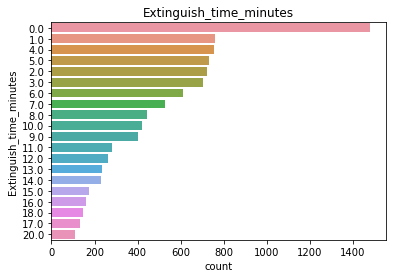

In [34]:
order = df3['Extinguish_time_minutes'].value_counts(ascending=False).head(20).index
sns.countplot(y=df3['Extinguish_time_minutes'],order=order).set_title("Extinguish_time_minutes")

Text(0.5, 1.0, 'Reaction_time_minutes')

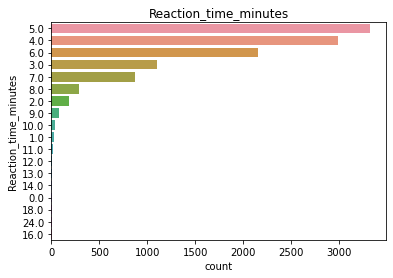

In [35]:
order = df3['Reaction_time_minutes'].value_counts(ascending=False).head(20).index
sns.countplot(y=df3['Reaction_time_minutes'],order=order).set_title("Reaction_time_minutes")

Text(0.5, 1.0, 'Time_spent_minutes')

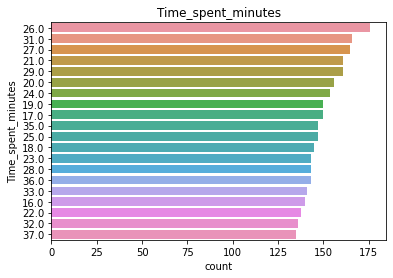

In [36]:
order = df3['Time_spent_minutes'].value_counts(ascending=False).head(20).index
sns.countplot(y=df3['Time_spent_minutes'],order=order).set_title("Time_spent_minutes")

<AxesSubplot:xlabel='count', ylabel='Month'>

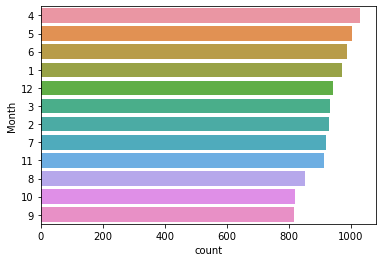

In [26]:
order = df3['Month'].value_counts(ascending=False).index
sns.countplot(y=df3['Month'],order=order)

<AxesSubplot:xlabel='count', ylabel='Year'>

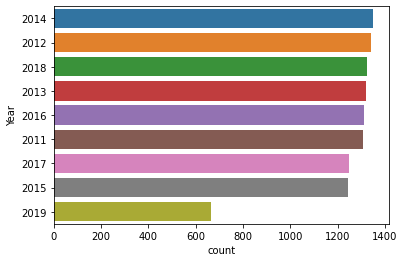

In [33]:
order = df3['Year'].value_counts(ascending=False).index
sns.countplot(y=df3['Year'],order=order)

<AxesSubplot:xlabel='count', ylabel='Part_of_Day'>

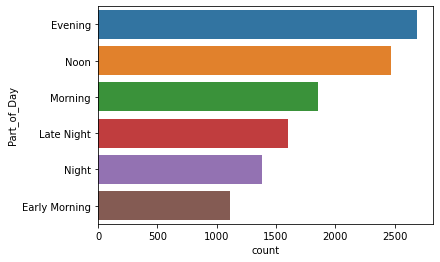

In [27]:
order = df3['Part_of_Day'].value_counts(ascending=False).index
sns.countplot(y=df3['Part_of_Day'],order=order)

# Visualization with respect to Casualities

<AxesSubplot:xlabel='count', ylabel='Area_of_Origin'>

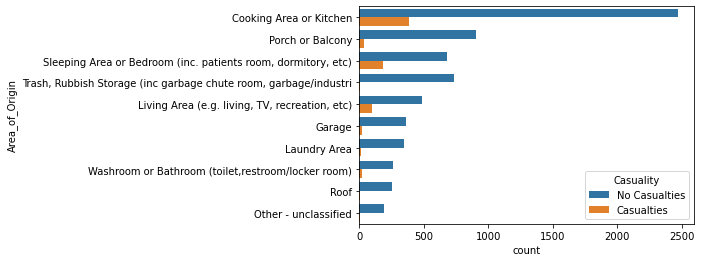

In [28]:
order = df3['Area_of_Origin'].value_counts(ascending=False).head(10).index
sns.countplot(y=df3['Area_of_Origin'],order=order,hue=df3['Casuality'])

<AxesSubplot:xlabel='count', ylabel='Material_First_Ignited'>

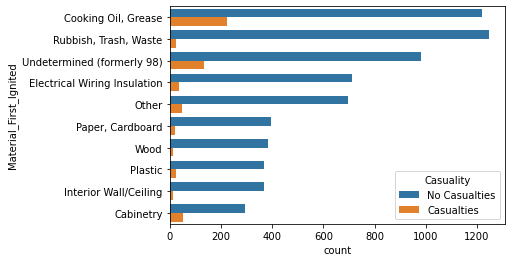

In [29]:
order = df3['Material_First_Ignited'].value_counts(ascending=False).head(10).index
sns.countplot(data=df3,y='Material_First_Ignited',order=order,hue='Casuality')

Text(0.5, 1.0, 'Ignition_Source')

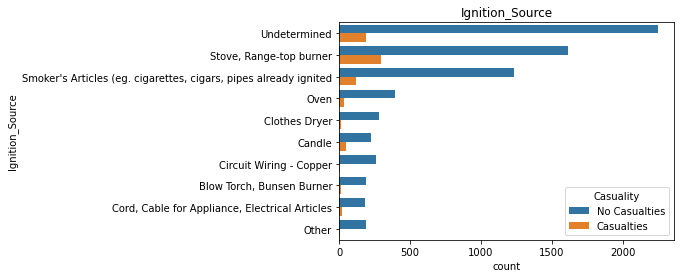

In [30]:
order = df3['Ignition_Source'].value_counts(ascending=False).head(10).index
sns.countplot(data=df3,y='Ignition_Source',order=order,hue='Casuality').set_title("Ignition_Source")

<AxesSubplot:xlabel='count', ylabel='Possible_Cause'>

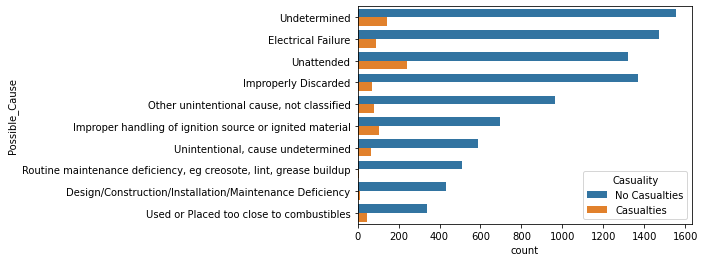

In [31]:
order = df3['Possible_Cause'].value_counts(ascending=False).head(10).index
sns.countplot(data=df3,y='Possible_Cause',order=order,hue='Casuality')

# Insights

- Casualties most often occur in the cooking and sleeping area’s.
- Casualties most often occur during improper handling of cooking oil, cabinetry, bedding and mattresses/pillows.
- Most fire accidents happened at April
- Most fire accidents has happened during Evening
- Toranto Fire Service controlled fire and left the scene within in half an hour since arrival, in most cases
- Toranto Fire Service responded to the fire alerts within 5 minutes and arrived at the scene
- Most fire accidents have been extinguished within couple minutes
- In Most fire accidents Cooking Oil,Grease were the first material to catch fire
- Ward 20 has recorded frequent fire incidents
- Most fire accidents are originated from cooking area or Kitchen
- Year 2014 has reported highest number of fire accidents

